In [1]:
from ortools.linear_solver import pywraplp
import numpy as np

<b>Q2 
    <ul>
    Variables : 
    <ul> 
        <li>X1a = number of hours for region A that less or equal to 100 hours</li>
        <li>X2a = number of hours for region A that exceed 100 hours</li>
        <li>X1b = number of hours for region B that less or equal to 200 hours</li>
        <li>X2b = number of hours for region B that exceed 200 hours</li>        
        <li>X1c = number of hours for region C that less or equal to 200 hours</li>
        <li>X2c = number of hours for region C that exceed 200 hours</li> 
    </ul>
    Constrains:
    <ul> x1a + x2a + x1b + x2b + x1c + x2c = 600
    </ul>
    Objective: 
    <ul>   
    Maximize (60 * x1a + 40 * x2a + 50 * x1b + 45 * x2b + 55 * x1c + 42 * x2c)
    </ul>    

In [2]:
solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')
#.Solver.GLOP_LINEAR_PROGRAMMING or CLP_LINEAR_PROGRAMMING
# or CBC_MIXED_INTEGER_PROGRAMMING

objective=solver.Objective()
objective.SetMaximization()


In [3]:
#variables
infinity = solver.infinity()
x1a = solver.NumVar(0, 100, 'x1a')
x2a = solver.NumVar(0, infinity, 'x2a')
x1b = solver.NumVar(0, 200, 'x1b')
x2b = solver.NumVar(0, infinity, 'x2b')
x1c = solver.NumVar(0, 200, 'x1c')
x2c = solver.NumVar(0, infinity, 'x2c')


#constrains
solver.Add(x1a + x2a + x1b + x2b + x1c + x2c == 600)


#optimization
solver.Maximize(60 * x1a + 40 * x2a + 50 * x1b + 45 * x2b + 55 * x1c + 42 * x2c)

In [4]:
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('# of hours <= 100 for region A is' , x1a.solution_value())
    print('# of hours > 100 for region A is ', x2a.solution_value())
    print('# of hours <= 100 for region B is ', x1b.solution_value())
    print('# of hours > 100 for region B is ', x2b.solution_value())
    print('# of hours <= 100 for region C is ', x1c.solution_value())
    print('# of hours > 100 for region C is ', x2c.solution_value())
    
    print('Total sales-agent hours for region A is ', x1a.solution_value() + x2a.solution_value())
    print('Total sales-agent hours for region B is ', x1b.solution_value() + x2b.solution_value())
    print('Total sales-agent hours for region C is ', x1c.solution_value() + x2c.solution_value())    
    
    
else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 31500.0
# of hours <= 100 for region A is 100.0
# of hours > 100 for region A is  0.0
# of hours <= 100 for region B is  200.0
# of hours > 100 for region B is  100.0
# of hours <= 100 for region C is  200.0
# of hours > 100 for region C is  0.0
Total sales-agent hours for region A is  100.0
Total sales-agent hours for region B is  300.0
Total sales-agent hours for region C is  200.0


<b>Q4

In [4]:
from ortools.linear_solver import pywraplp
import numpy as np
solver = pywraplp.Solver.CreateSolver('assignment_mip', 'CBC')
#.Solver.GLOP_LINEAR_PROGRAMMING or CLP_LINEAR_PROGRAMMING
# or CBC_MIXED_INTEGER_PROGRAMMING

# objective=solver.Objective()
# objective.SetMaximization()

In [5]:
#variables
infinity = solver.infinity()
x1 = solver.NumVar(0, infinity, 'x1')
x2 = solver.NumVar(0, infinity, 'x2')

#constrains
solver.Add(x2 - x1 <= 2)
solver.Add(x2 <= 5)


<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x7fd525ebcf90> >

In [7]:
solution = []
pi = np.pi
A = np.linspace(0,2*pi)
for i in A:
    #objective:
    solver.Maximize(np.cos(i)*x1 + np.sin(i)*x2)    
    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        solution.append([i,solver.Objective().Value(),x1.solution_value(),x2.solution_value()])
    else:
        solution.append([i,'unbounded'])

print(solution)
   

[[0.0, 'unbounded'], [0.1282282715750936, 'unbounded'], [0.2564565431501872, 'unbounded'], [0.38468481472528077, 'unbounded'], [0.5129130863003744, 'unbounded'], [0.6411413578754679, 'unbounded'], [0.7693696294505615, 'unbounded'], [0.8975979010256552, 'unbounded'], [1.0258261726007487, 'unbounded'], [1.1540544441758422, 'unbounded'], [1.2822827157509358, 'unbounded'], [1.4105109873260295, 'unbounded'], [1.538739258901123, 'unbounded'], [1.6669675304762166, 4.688826487022946, 3.0, 5.0], [1.7951958020513104, 4.207076759040175, 3.0, 5.0], [1.9234240736264039, 3.6562469469848797, 3.0, 5.0], [2.0516523452014974, 3.045381661142495, 3.0, 5.0], [2.179880616776591, 2.3845112926182725, 3.0, 5.0], [2.3081088883516845, 1.6844873145926291, 3.0, 5.0], [2.436337159926778, 1.2964567906155775, 0.0, 2.0], [2.5645654315018716, 1.091069802421098, 0.0, 2.0], [2.6927937030769655, 0.8677674782351165, 0.0, 2.0], [2.821021974652059, 0.6302164360472416, 0.0, 2.0], [2.9492502462271526, 0.3823172574027451, 0.0, 

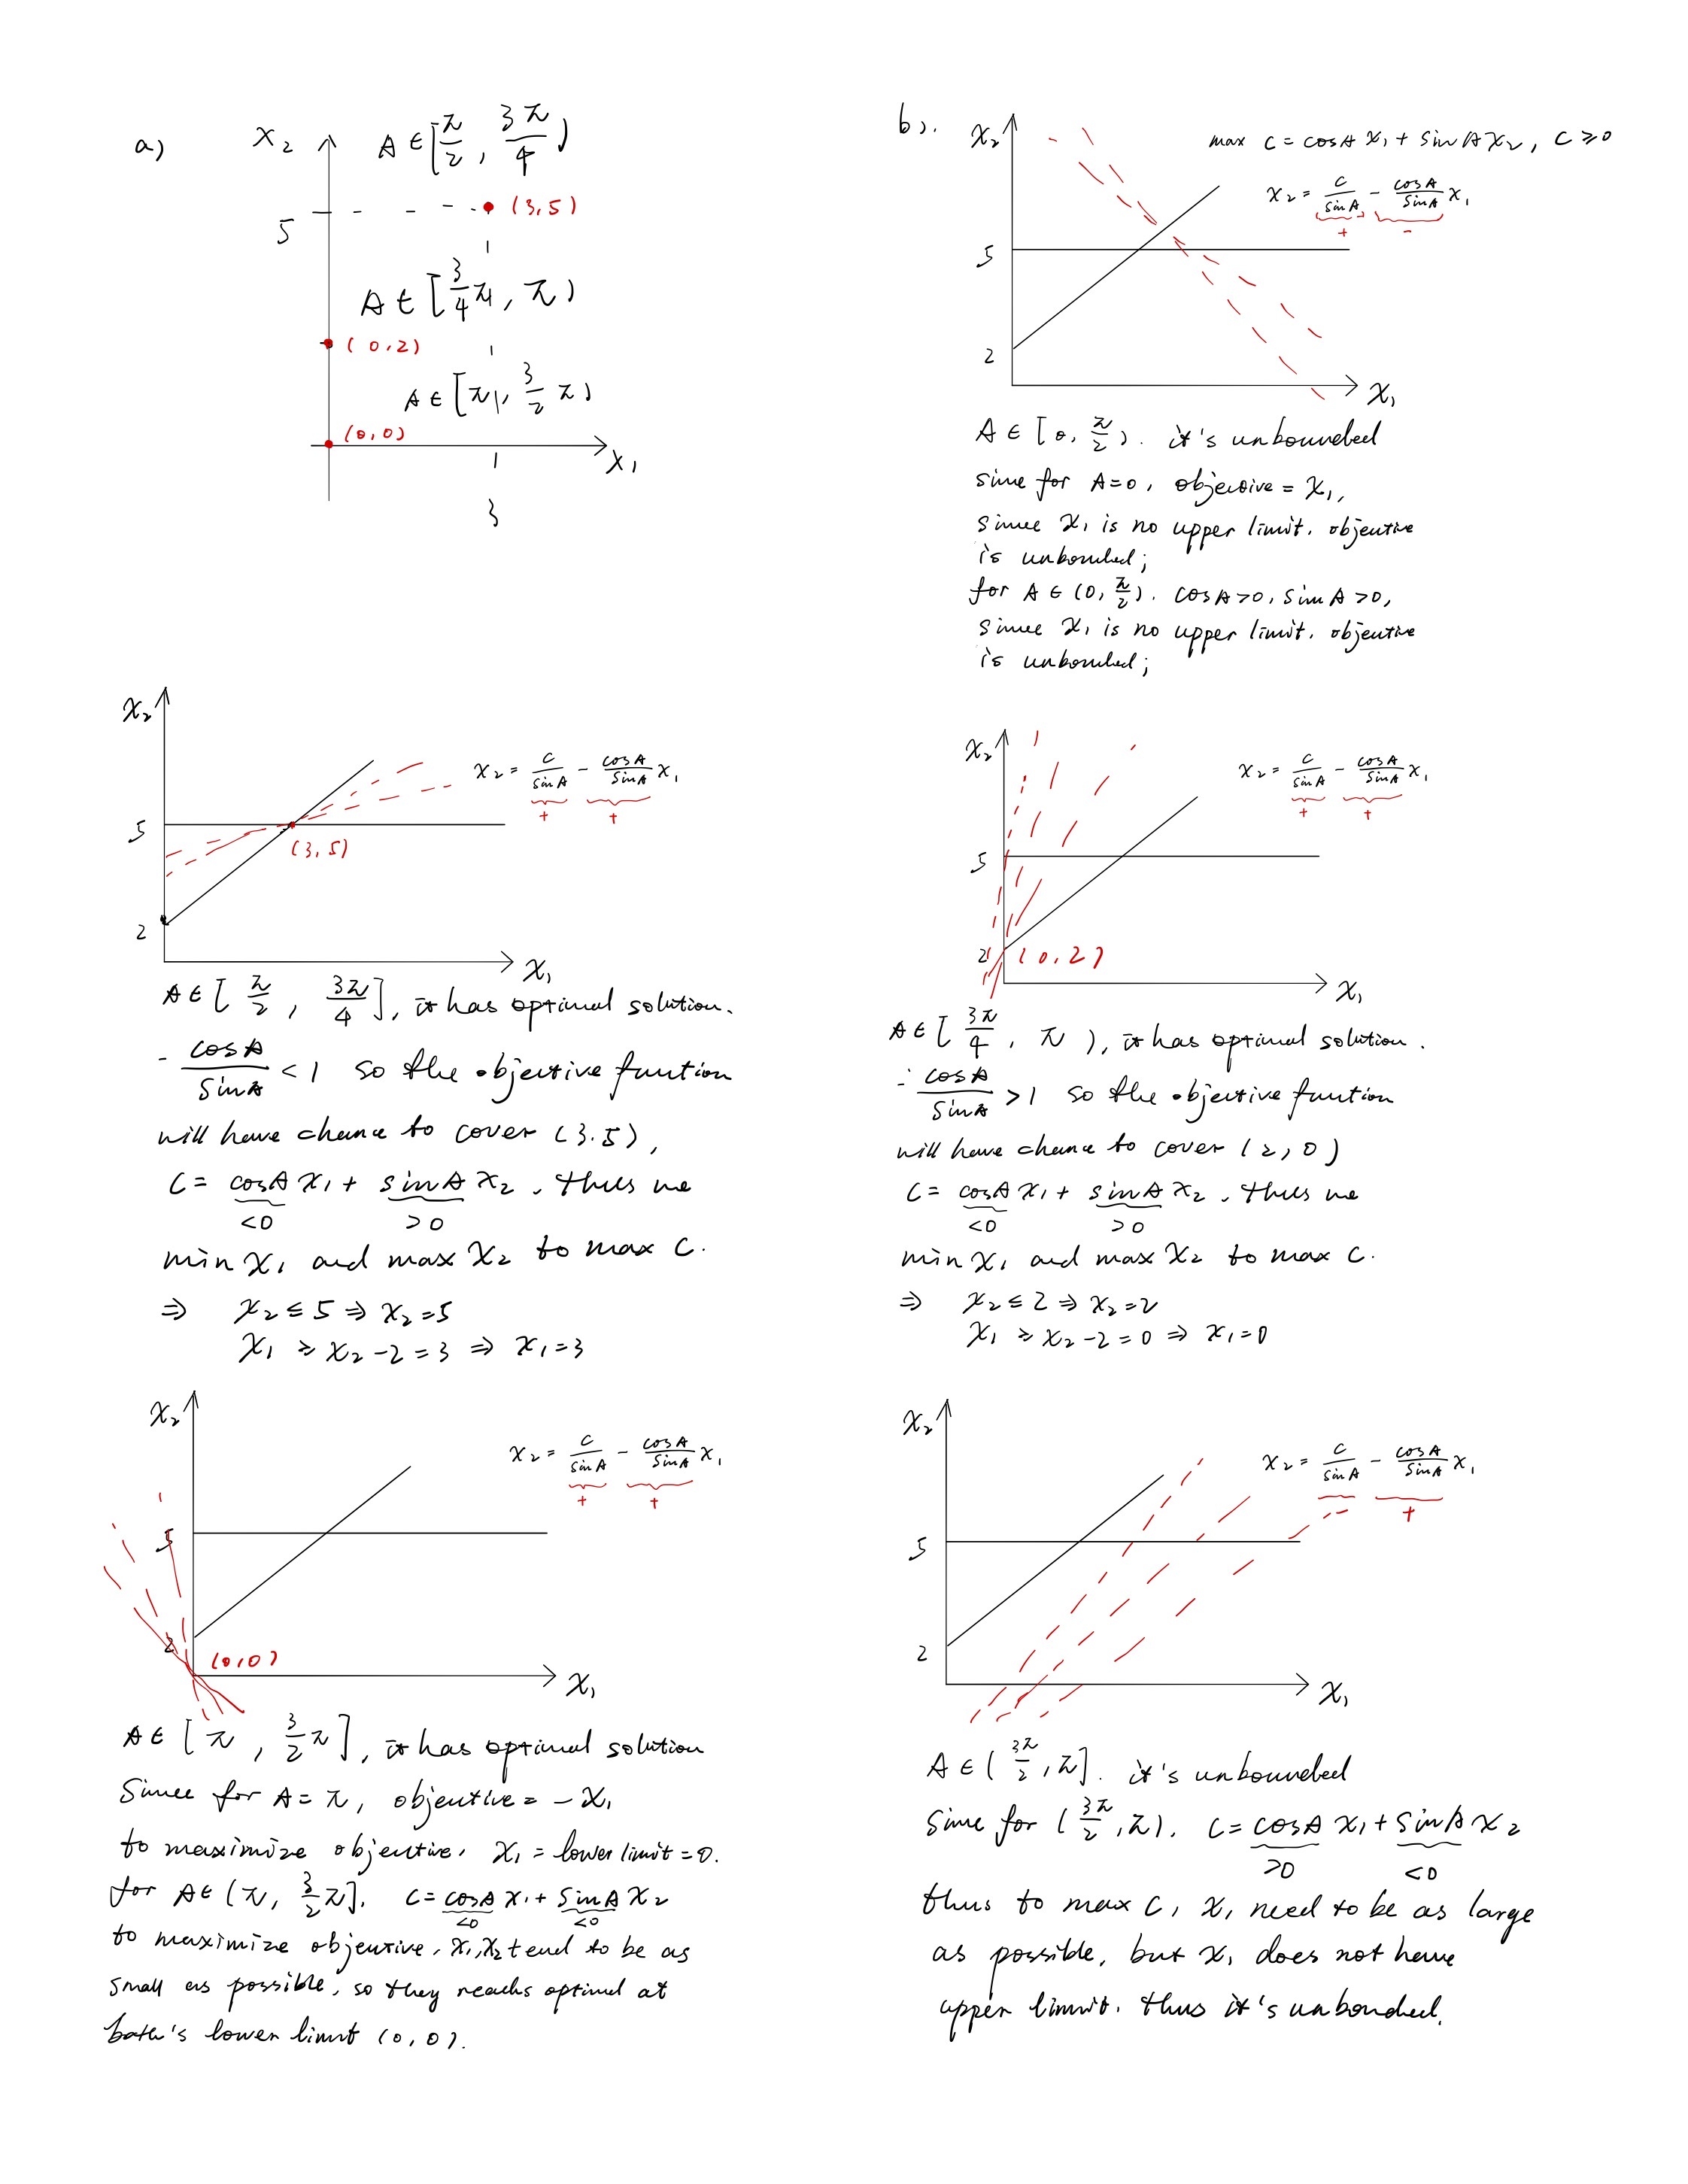

In [9]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "/Users/sylvia/Desktop/MASTER COURSE/OM/Q4.JPG", width = 600, height = 300)